In [15]:
# antes de empezar importamos la librería de NumPy para poder trabajar con todos sus métodos. 
import numpy as np

# importamos la pandas para poder trabajar en la lección
import pandas as pd

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

from itertools import combinations
from scipy.stats import shapiro, kstest

### Ejercicios estadística descriptiva
En este caso usaremos el mismo DataFrame que hemos estado usando en los últimos pairs. El ejercicio que os planteamos es:
Eres un analista de datos que trabaja para una organización internacional que se enfoca en el desarrollo y el bienestar de los países. Tu objetivo es realizar un análisis inicial de estadísticas descriptivas sobre varios países utilizando el conjunto de datos proporcionado.
- Objetivo: Realizar un análisis de estadísticas descriptivas para comprender mejor la situación de los países en términos de diversos indicadores.

Recuerda proporcionar interpretaciones y conclusiones basadas en los resultados obtenidos en cada paso.

In [16]:
df=pd.read_csv('world_final.csv', index_col=0)

1. Calcula las siguientes estadísticas descriptivas para las variables numéricas:
    - Media
    - Mediana
    - Desviación estándar
    - Mínimo
    - Máximo

In [17]:
variables_numericas = df.select_dtypes(include=['float64', 'int64'])

In [18]:
variables_numericas.describe()

,density,agriculturalland,forestedarea,grossprimaryeducationenrollment,populationlaborforceparticipation,taxrevenue,latitude,longitude,gasolineprice_i,lifeexpectancy_i,landarea_k,armedforcessize_k,birthrate_k,callingcode_k,co2-emissions_k,cpi_k,cpichange_k,fertilityrate_k,gdp_k,grosstertiaryeducationenrollment_k,infantmortality_k,maternalmortalityratio_k,minimumwage_k,outofpockethealthexpenditure_k,population_k,totaltaxrate_k,unemploymentrate_k,urban_population_k
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,194.000000,194.000000,195.000000,195.000000,1.950000e+02,1.950000e+02,195.000000,195.000000,1.950000e+02,195.000000,195.000000,195.000000,1.950000e+02,195.000000,195.000000,195.000000,195.000000,195.000000,1.950000e+02,195.000000,195.000000,1.950000e+02
mean,356.764103,39.134872,32.014872,102.473077,62.710000,16.537436,19.092351,20.232434,1.006369,72.381571,6.896244e+05,1.411286e+05,20.275790,360.546392,1.723727e+05,186.989164,6.626474,2.714996,4.748571e+11,37.060428,21.491245,163.787653,2.152555,32.486960,3.938116e+07,41.061141,6.994576,2.186941e+07
std,1982.888967,21.386637,23.358162,12.912165,9.975707,6.479029,23.961779,66.716110,0.350133,7.385777,1.916650e+06,3.597789e+05,9.873024,322.402259,8.240844e+05,380.364538,23.441717,1.268063,2.161216e+12,28.718024,19.392911,229.154387,2.677302,18.962274,1.447180e+08,20.049304,4.871460,7.451338e+07
min,2.000000,0.600000,0.000000,23.400000,38.000000,0.000000,-40.900557,-175.198242,0.000000,52.800000,0.000000e+00,0.000000e+00,5.900000,1.000000,1.100000e+01,99.030000,-4.300000,0.980000,4.727146e+07,0.800000,1.400000,2.000000,0.010000,0.200000,8.360000e+02,8.000000,0.090000,5.464000e+03
25%,35.500000,22.650000,11.450000,99.350000,57.250000,12.550000,4.544175,-7.941496,0.790000,67.450000,2.445650e+04,7.000000e+03,11.350000,83.000000,2.033500e+03,114.415000,1.000000,1.710000,8.285623e+09,12.150000,6.100000,16.500000,0.505000,17.600000,2.004434e+06,30.900000,3.590000,1.140078e+06
50%,89.000000,39.600000,32.000000,102.550000,62.450000,16.300000,17.273849,20.972652,0.990000,73.200000,1.205380e+05,2.400000e+04,18.180000,256.000000,1.090200e+04,127.630000,2.500000,2.270000,3.438723e+10,28.100000,14.600000,65.000000,1.234000,30.900000,8.877067e+06,37.500000,5.650000,4.418218e+06
75%,216.500000,54.850000,47.450000,107.550000,68.300000,20.300000,40.124603,48.281523,1.185000,77.500000,5.541675e+05,1.250000e+05,28.695000,506.500000,6.294550e+04,158.450000,4.850000,3.580000,2.358901e+11,61.100000,32.800000,204.000000,2.536000,43.850000,2.888532e+07,48.600000,9.224000,1.484924e+07
max,26337.000000,82.600000,98.300000,142.500000,86.800000,37.200000,64.963051,178.065032,2.000000,85.400000,1.709824e+07,3.031000e+06,46.080000,1876.000000,9.893038e+06,4583.710000,254.900000,6.910000,2.142770e+13,136.600000,84.500000,1150.000000,13.590000,81.600000,1.397715e+09,219.600000,28.180000,8.429340e+08


2. Identifica el país con la mayor densidad de población y el país con la menor población en el conjunto de datos.

In [19]:
pais_max=df.loc[df['population_k']==df['population_k'].max(),'country']
pais_max

36    China
Name: country, dtype: object

In [20]:
pais_min=df.loc[df['population_k']==df['population_k'].min(),'country']
pais_min

73    Vatican City
Name: country, dtype: object

3. Calcula la tasa promedio de natalidad (birth_rate) para todos los países en el conjunto de datos.

In [21]:
promedio_natalidad=df['birthrate_k'].mean()
promedio_natalidad

20.27578960792294

4. Realiza un análisis de la mortalidad infantil (infant_mortality) y clasifica los países en tres categorías: baja, moderada y alta mortalidad infantil.

In [22]:
mi_baja=float(np.percentile(df['infantmortality_k'],[25]))
mi_alta=float(np.percentile(df['infantmortality_k'],[75]))
mortalidad_alta=[]
mortalidad_baja=[]
mortalidad_moderada=[]
for pais in df['country']:
    mortalidad_pais=float(df[df['country']==pais]['infantmortality_k'])
    if mortalidad_pais>= mi_alta:
        mortalidad_alta.append(pais)
        #print(f'La mortalidad infaltil del país {pais} es alta')
    elif mortalidad_pais<= mi_baja:
        mortalidad_baja.append(pais)
        #print(f'La mortalidad infaltil del país {pais} es baja')
    else:
        mortalidad_moderada.append(pais)
        #print(f'La mortalidad infaltil del país {pais} es moderada')

/var/folders/fy/lv_7fpvj1v5grf8t28cz_4nw0000gn/T/ipykernel_21855/1425424682.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mortalidad_pais=float(df[df['country']==pais]['infantmortality_k'])


In [23]:
print(f'La lista de países con mortalidad infantil alta es: {mortalidad_alta}')
print(f'La lista de países con mortalidad infantil baja es: {mortalidad_baja}')
print(f'La lista de países con mortalidad infantil moderada es: {mortalidad_moderada}')

La lista de países con mortalidad infantil alta es: ['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Ivory Coast', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Republic of the Congo', 'Democratic Republic of the Congo', 'Djibouti', 'Dominica', 'Equatorial Guinea', 'Eswatini', 'Ethiopia', 'The Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Kiribati', 'Laos', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar', 'Niger', 'Nigeria', 'North Macedonia', 'Pakistan', 'Papua New Guinea', 'Sierra Leone', 'Somalia', 'South Sudan', 'Sudan', 'Tanzania', 'East Timor', 'Togo', 'Turkmenistan', 'Uganda', 'Yemen', 'Zambia', 'Zimbabwe']
La lista de países con mortalidad infantil baja es: ['Andorra', 'Antigua and Barbuda', 'Australia', 'Austria', 'Bahrain', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Canada', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Gre

5. Calcula la correlación entre las variables de "fertility_rate" y "life_expectancy". Interpreta la relación entre estas dos variables. ¿Qué tipo de correlación hay? Explica la razón de esta relación

In [24]:
lista_var=['fertilityrate_k','life_expectancy_i']
correlacion= list(combinations(lista_var,2))
correlacion

[('fertilityrate_k', 'life_expectancy_i')]

In [25]:
correlation_matrix = df[['fertilityrate_k','lifeexpectancy_i']].corr(numeric_only = True, method = "spearman")
correlation_matrix

,fertilityrate_k,lifeexpectancy_i
fertilityrate_k,1.000000,-0.830914
lifeexpectancy_i,-0.830914,1.000000


Como se puede observar, la correlación es de -0.83, esto nos indica que son variables relacionadas de forma inversa (cuando una aumenta la otra disminuye) y además, al ser un valor cercano a -1 están altamente relacionadas

6. Visualiza la distribución de la variable "cpi" utilizando un histograma y comenta sobre la distribución de los índices de percepción de corrupción.

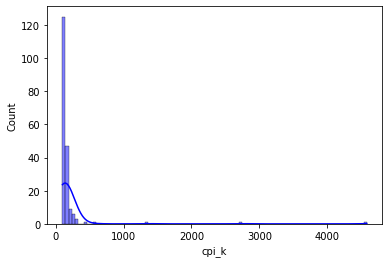

In [26]:
sns.histplot(x = "cpi_k", data = df, color = "blue", kde = True, bins = 100);

Según el histograma, hay muchos países con un bajo valor de cpi, y muy pocos con un alto valor de cpi. La diferencia entre la cantidad de unos y de otros es abismal

7. Encuentra el país con la mayor diferencia entre el "gdp" (Producto Interno Bruto) y el "co2-emissions" (emisiones de dióxido de carbono).

8. Calcula el porcentaje promedio de personas que participan en la fuerza laboral(population_labor_force_participation) para todos los países.

9. Genera un mapa de calor (heatmap) de la matriz de correlación de todas las variables numéricas y discute las relaciones más destacadas.

In [27]:
lista_col_num =[ "density",	"agriculturalland",	"forestedarea",	"grossprimaryeducationenrollment",	"populationlaborforceparticipation",	"taxrevenue",	"latitude",	"longitude", "gasolineprice_i",	"lifeexpectancy_i",	"landarea_k", "armedforcessize_k",	"birthrate_k", 	"callingcode_k", 	"co2-emissions_k",	"cpi_k", 	"cpichange_k",	"fertilityrate_k",	"gdp_k", "grosstertiaryeducationenrollment_k", 	"infantmortality_k",	"maternalmortalityratio_k",	"minimumwage_k", 	"outofpockethealthexpenditure_k", 	"population_k", 	"totaltaxrate_k",	"unemploymentrate_k", "urban_population_k"]

# usando el metodo 'combinations' vamos a generar todas las combinaciones posibles de columnas
combinaciones = list(combinations(lista_col_num, 2))

# printeamos los resultados, una lista de tuplas
combinaciones

[('density', 'agriculturalland'),
 ('density', 'forestedarea'),
 ('density', 'grossprimaryeducationenrollment'),
 ('density', 'populationlaborforceparticipation'),
 ('density', 'taxrevenue'),
 ('density', 'latitude'),
 ('density', 'longitude'),
 ('density', 'gasolineprice_i'),
 ('density', 'lifeexpectancy_i'),
 ('density', 'landarea_k'),
 ('density', 'armedforcessize_k'),
 ('density', 'birthrate_k'),
 ('density', 'callingcode_k'),
 ('density', 'co2-emissions_k'),
 ('density', 'cpi_k'),
 ('density', 'cpichange_k'),
 ('density', 'fertilityrate_k'),
 ('density', 'gdp_k'),
 ('density', 'grosstertiaryeducationenrollment_k'),
 ('density', 'infantmortality_k'),
 ('density', 'maternalmortalityratio_k'),
 ('density', 'minimumwage_k'),
 ('density', 'outofpockethealthexpenditure_k'),
 ('density', 'population_k'),
 ('density', 'totaltaxrate_k'),
 ('density', 'unemploymentrate_k'),
 ('density', 'urban_population_k'),
 ('agriculturalland', 'forestedarea'),
 ('agriculturalland', 'grossprimaryeducatio

In [28]:
# Test de Sapiro: Prueba estadística pra saber si cada una de las combinaciones de variables tienen una relación lineal o no para elegir el mejor método para analizar la correlación. 

# creamos una función para identificar si las relaciones entre las variables son lienales o no
def identificar_linealidad (dataframe, combinaciones):
    
    relaciones_lineales = []
    relaciones_no_lineales = []

    for tupla in combinaciones: 
        # Realizar la prueba de normalidad
        _, p_value1 = kstest(dataframe[tupla[0]], "norm")
        _, p_value2 = kstest(dataframe[tupla[1]], "norm")

        if p_value1 > 0.05 and p_value2 > 0.05:
            relaciones_lineales.append(tupla)
        else:
            relaciones_no_lineales.append(tupla)

    return relaciones_lineales, relaciones_no_lineales

# llamamos a la funcion

lineal, no_lineal = identificar_linealidad(df, combinaciones)

print(f"Las variables a las que tengamos que aplicar la correlacion de pearson son: {lineal}")
print(f"Las variables a las que tengamos que aplicar la correlacion de spearman son: {no_lineal}")

Las variables a las que tengamos que aplicar la correlacion de pearson son: []
Las variables a las que tengamos que aplicar la correlacion de spearman son: [('density', 'agriculturalland'), ('density', 'forestedarea'), ('density', 'grossprimaryeducationenrollment'), ('density', 'populationlaborforceparticipation'), ('density', 'taxrevenue'), ('density', 'latitude'), ('density', 'longitude'), ('density', 'gasolineprice_i'), ('density', 'lifeexpectancy_i'), ('density', 'landarea_k'), ('density', 'armedforcessize_k'), ('density', 'birthrate_k'), ('density', 'callingcode_k'), ('density', 'co2-emissions_k'), ('density', 'cpi_k'), ('density', 'cpichange_k'), ('density', 'fertilityrate_k'), ('density', 'gdp_k'), ('density', 'grosstertiaryeducationenrollment_k'), ('density', 'infantmortality_k'), ('density', 'maternalmortalityratio_k'), ('density', 'minimumwage_k'), ('density', 'outofpockethealthexpenditure_k'), ('density', 'population_k'), ('density', 'totaltaxrate_k'), ('density', 'unemploym

In [29]:
# Todas las parejas de variables tienen relaciones no lineales.
#  aplicaremos la correlación de Spearman a las columnas que nos interesan (lista_variables)

df_seleccionado = df[lista_col_num]

# Calculamos la correlación de Spearman para las columnas seleccionadas
df_correlaciones_seleccionadas = df_seleccionado.corr(method='spearman')

# Muestra el resultado como DataFrame
df_correlaciones_seleccionadas

,density,agriculturalland,forestedarea,grossprimaryeducationenrollment,populationlaborforceparticipation,taxrevenue,latitude,longitude,gasolineprice_i,lifeexpectancy_i,landarea_k,armedforcessize_k,birthrate_k,callingcode_k,co2-emissions_k,cpi_k,cpichange_k,fertilityrate_k,gdp_k,grosstertiaryeducationenrollment_k,infantmortality_k,maternalmortalityratio_k,minimumwage_k,outofpockethealthexpenditure_k,population_k,totaltaxrate_k,unemploymentrate_k,urban_population_k
density,1.000000,0.147372,-0.115015,0.027640,-0.058024,0.056559,0.138095,0.080083,0.180973,0.221950,-0.565343,-0.020767,-0.256306,-0.022783,-0.043051,-0.170176,-0.156894,-0.228503,-0.008190,0.029261,-0.165066,-0.101719,0.137549,-0.005655,-0.075104,-0.022050,-0.141862,-0.073236
agriculturalland,0.147372,1.000000,-0.384844,-0.062459,-0.157066,-0.057405,0.006076,-0.011380,0.015689,-0.216871,0.144010,0.190696,0.172422,-0.043580,0.083079,0.241240,0.259923,0.164872,0.079967,-0.129145,0.193146,0.132890,-0.185435,0.100546,0.269866,0.162726,0.045211,0.228850
forestedarea,-0.115015,-0.384844,1.000000,0.112982,0.149352,0.072990,-0.173032,-0.082101,0.167421,-0.004018,-0.135926,-0.187371,-0.079720,-0.080402,-0.174387,-0.089244,-0.048283,-0.067728,-0.128961,0.002349,-0.035630,0.034793,0.060075,-0.180689,-0.184431,0.093627,-0.045482,-0.182427
grossprimaryeducationenrollment,0.027640,-0.062459,0.112982,1.000000,0.155443,0.035478,-0.195158,-0.079723,-0.054167,-0.026138,0.000042,-0.036589,0.057557,-0.066401,-0.046288,0.086976,-0.001468,0.043352,-0.052076,-0.067313,0.064374,0.105882,-0.053737,-0.102878,0.030942,-0.011903,-0.064270,0.011443
populationlaborforceparticipation,-0.058024,-0.157066,0.149352,0.155443,1.000000,-0.120244,-0.307536,0.072858,-0.075336,-0.142062,-0.011295,-0.077567,0.200143,0.076421,-0.164889,0.024117,-0.051757,0.178254,-0.117851,-0.183814,0.161145,0.228409,-0.172723,-0.116571,-0.027023,-0.102699,-0.460790,-0.081336
taxrevenue,0.056559,-0.057405,0.072990,0.035478,-0.120244,1.000000,0.115244,-0.120588,0.368778,0.346354,-0.393475,-0.328650,-0.367577,0.020763,-0.194524,-0.301942,-0.211942,-0.366449,-0.179818,0.287551,-0.362396,-0.346670,0.332423,-0.312266,-0.436614,-0.157146,0.213284,-0.395600
latitude,0.138095,0.006076,-0.173032,-0.195158,-0.307536,0.115244,1.000000,-0.024289,0.166253,0.518105,-0.049150,0.204037,-0.587441,-0.040948,0.365426,-0.242736,-0.106603,-0.560722,0.354581,0.490863,-0.580923,-0.574853,0.308676,0.090876,0.050126,-0.016408,0.018800,0.134022
longitude,0.080083,-0.011380,-0.082101,-0.079723,0.072858,-0.120588,-0.024289,1.000000,-0.160741,-0.129266,0.059005,0.199192,0.057911,0.304712,0.117841,0.152323,0.057994,0.051801,0.039517,-0.051270,0.071319,-0.036512,-0.098010,0.020869,0.119498,-0.177428,-0.179384,0.065029
gasolineprice_i,0.180973,0.015689,0.167421,-0.054167,-0.075336,0.368778,0.166253,-0.160741,1.000000,0.327588,-0.330897,-0.242734,-0.298627,-0.157827,-0.233526,-0.298733,-0.112963,-0.258210,-0.077740,0.122489,-0.304309,-0.191846,0.374952,-0.276335,-0.261803,0.028879,0.068603,-0.233503
lifeexpectancy_i,0.221950,-0.216871,-0.004018,-0.026138,-0.142062,0.346354,0.518105,-0.129266,0.327588,1.000000,-0.204568,0.152089,-0.855504,-0.141163,0.409191,-0.403815,-0.310666,-0.830914,0.473856,0.756714,-0.913592,-0.814475,0.672947,-0.325582,-0.079978,-0.160729,0.015716,0.076016


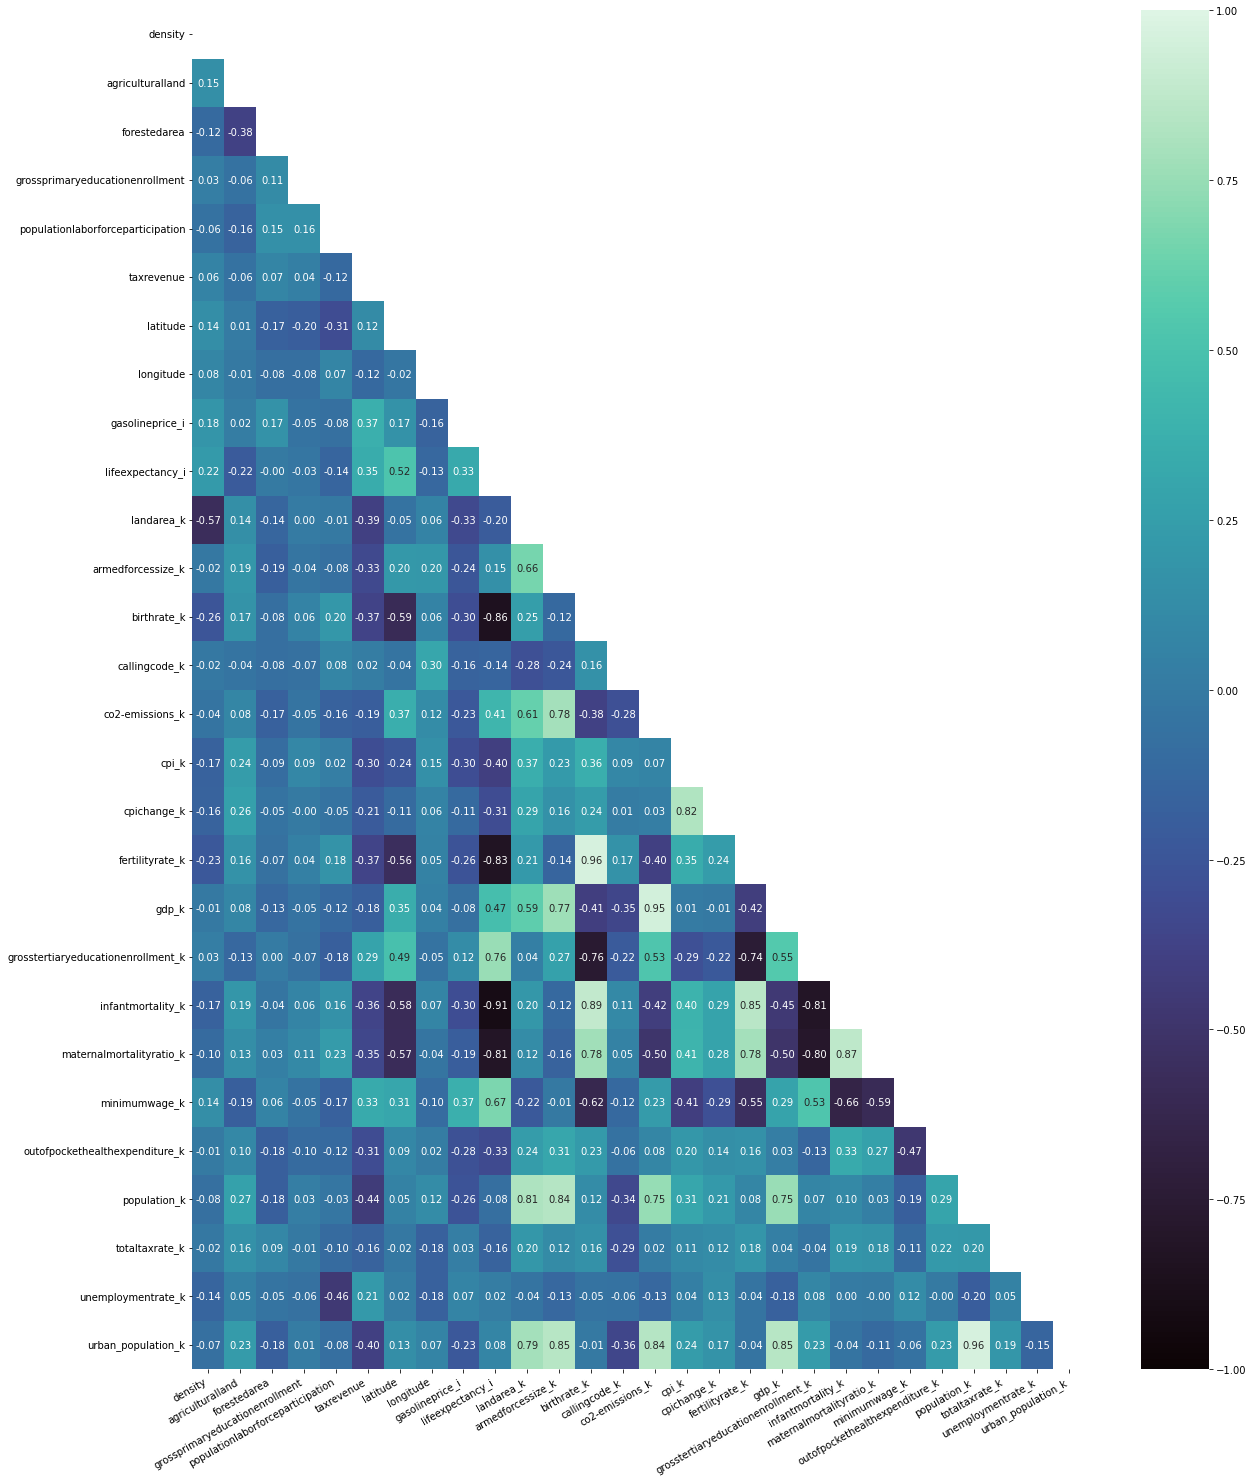

In [30]:
#Gráfica heatmap

# AHORA YA PODREMOS ENTENDER DE UNA FORMA MÁS AMIGABLE LOS RESULTADOS DE LA MATRIZ DE CORRELACIÓN
# establecemos el tamaño de la gráfica
plt.figure(figsize = (20, 25))

# creamos una matriz booleana de máscara
mask = np.triu(np.ones_like(df_correlaciones_seleccionadas, dtype=bool))

# creamos un heatmap con la máscara
heatmap = sns.heatmap(df_correlaciones_seleccionadas, 
            annot = True, 
            fmt = ".2f", 
            cmap = "mako", 
            vmax = 1, 
            vmin = -1, 
            mask = mask); 


# Rotamos las etiquetas del eje Y a 0 grados - horizontal
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

# Rotamos las etiquetas del eje X a 45 grados
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=30, horizontalalignment='right')


# Mostramos la gráfica
plt.show()